In [2]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import scipy.stats

# Calculate z-value for 90% confidence interval
confidence_level = 0.9
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval

In [3]:
# mean
mean_time_case = [] 
# mean_time_case2= [] 
# mean_time_case3 = [] 
# mean_time_case4 = [] 
# mean_time_case5= [] 
# mean_time_case6 = [] 
# std
std_time_case = [] 
# std_time_cass2 = [] 
# std_time_case3 = [] 
# std_time_case4 = [] 
# std_time_case5 = [] 
# std_time_case6 = [] 

In [5]:
# Multiple pod

one = "/home/kien/kiem/serverless-giang/data/curl/mec/temp/x86_pod_1_rep_1_1612024_7h49.csv"
two = "/home/kien/kiem/serverless-giang/data/curl/mec/temp/x86_pod_1_rep_1_1612024_9h18.csv"
third = "/home/kien/kiem/serverless-giang/data/curl/mec/temp/x86_pod_1_rep_1_1612024_9h32.csv" 
four = "/home/kien/kiem/serverless-giang/data/curl/mec/temp/x86_pod_2_rep_1_1612024_9h48.csv"
five = "/home/kien/kiem/serverless-giang/data/curl/mec/temp/x86_pod_2_rep_1_1612024_10h5.csv"
six = "/home/kien/kiem/serverless-giang/data/curl/mec/temp/x86_pod_4_rep_1_1612024_10h37.csv" # De# Default

file_list = []
file_list.append(one)
file_list.append(two)
file_list.append(third)
file_list.append(four)
file_list.append(five)
file_list.append(six)

average_time_cpu_to_active = []

for file in file_list:
    average_time = [] 
    time_cpu_to_active = []
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[7] == "warm_cpu_to_active_process":
                time_cpu_to_active.append(float(row[6])/2)
        average_time_cpu_to_active.append(time_cpu_to_active)
    mean_time_case.append(np.mean(time_cpu_to_active))
    std_time_case.append(np.std(time_cpu_to_active)/np.sqrt(len(time_cpu_to_active)))

print(mean_time_case)
print(std_time_case)

[0.0020548800000000002, 0.0019463649999999998, 0.0019784075, 0.0020236975000000003, 0.0020017875000000003, 0.0019513756345177667]
[3.8762337107042455e-05, 3.4726826213678087e-05, 2.6552284289091775e-05, 3.681290736574266e-05, 3.155708249298008e-05, 3.2408649101003537e-05]


[3.379976820950042, 3.2014855296214018, 3.2541907519629945, 3.328686172727627, 3.2926474297611206, 3.209727289981279]
[0.06375837077963442, 0.057120546050081863, 0.043674621116759196, 0.06055184419917038, 0.051906781594585095, 0.053307484018383235]


/tmp/ipykernel_452885/413820040.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
/tmp/ipykernel_452885/413820040.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(state, fontsize = 12)


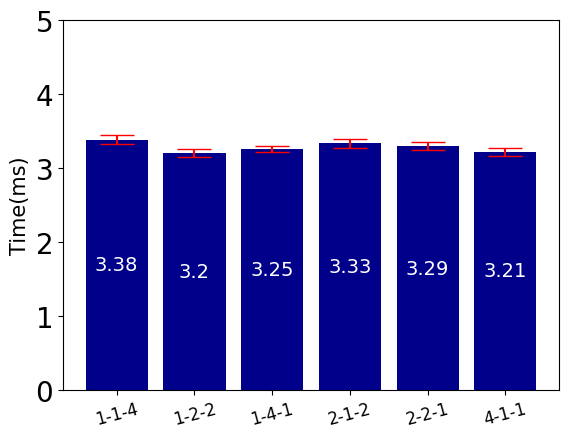

In [8]:
# data
data_time_case = [value*z_value*1000 for value in mean_time_case]
print(data_time_case)
error_time_case = [value*z_value*1000 for value in std_time_case]
print(error_time_case)

state = ["1-1-4", "1-2-2", "1-4-1", "2-1-2", "2-2-1", "4-1-1"]

fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))
ax1.bar(x_pos, data_time_case, yerr=error_time_case, align='center', alpha=0.9, ecolor='red', capsize=12)
# ax1.set_title('Average bw usage of states')
data_round = [round(x, 2) for x in data_time_case]
bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 14)
ax1.set_ylabel("Time(ms)", fontsize = 15)
# ax1.set_xlabel("State ($S$)", fontsize = 15)
# ax1.set_xticks(rotation=15)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
# ax1.set_xticks(x_pos)
# ax1.set_yticks(fontsize = 13)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xticklabels(state, fontsize = 12)
ax1.set_ylim(0,5)

plot.savefig('../pdf/bw-states.pdf', bbox_inches='tight')
plot.show()


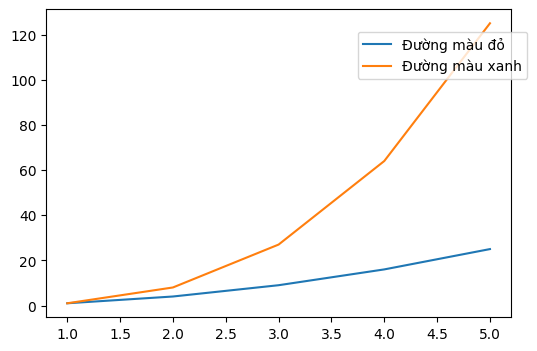

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [1, 8, 27, 64, 125]

# Vẽ hai đường
ax.plot(x, y1, label='Đường màu đỏ')
ax.plot(x, y2, label='Đường màu xanh')

# Tạo ô vuông chú thích
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 0.95))

plt.show()
